In [1]:
# 파이썬 ≥3.5
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import os
import numpy as np

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER = "DFT"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
N = 200
x_max = 400

# 1hz 10hz 100hz
h = (1, 5, 10, 100) # hz
HZ = [2*np.pi * i for i in h] # 2pi * hz
hz_index = 0

그림 저장: sin_1hz


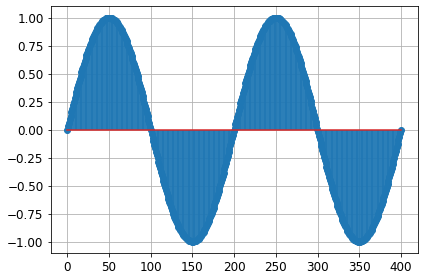

In [3]:
x = np.linspace(0,400, x_max)  # x범위 및 쪼개기
x_sin = np.sin(x * HZ[hz_index] / N) #sin파 생성
x_sum = np.sin(x*HZ[0]/N) + np.sin(x*HZ[1]/N) + np.sin(x*HZ[2]/N)
plt.stem(x, x_sin)
plt.grid()
save_fig('sin_1hz')

C:\Users\sypark\anaconda3\envs\example2\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


그림 저장: y


C:\Users\sypark\anaconda3\envs\example2\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

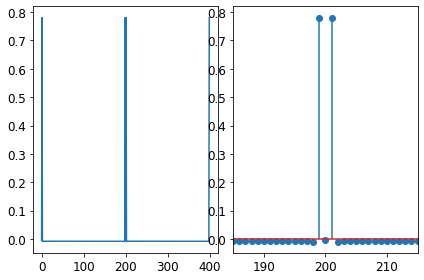

In [4]:
def Ck(k):
    c = [x_sin[index]*np.exp(-1j * 2 * np.pi * k * index / N) for index in range(N)]
    return sum(c)

y = [Ck(k) for k in range(N*2)]

plt.subplot(1,2,1)
plt.plot(y)
save_fig("y")
plt.subplot(1,2,2)
plt.xlim(185,215)
plt.stem(y)